<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Flowers_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Hello 🙌
In this Notebook, A Classifier is implemented in TensorFlow to classify images of [Flowers dataset](https://www.tensorflow.org/datasets/catalog/tf_flowers) from tensorflow, It contains 3670 images falling into 5 categories:


*   Daisy 💐
*   Roses 🌹
*   Dandelion 💮
*   SunFlower 🌻
*   Tulip 🌷

you can access it from here:

```gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/```



### Import Neccessary Libraries 🐾

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
print(tf.version.VERSION)

2.9.2


In [ ]:
gpu_name = tf.test.gpu_device_name()
print(f'The GPU found at: {gpu_name}')

The GPU found at: 


### Get Data ⚓

In [ ]:
path = 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/'

!gsutil cat gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv | head -50

gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/18089878729_907ed2c7cd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/284497199_93a01f48f6.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/4065883015_4bb6010cb7_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/roses/7420699022_60fa574524_m.jpg,roses
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/4558536575_d43a611bd4_n.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/7568630428_8cf0fc16ff_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/7064813645_f7f48fb527.jpg,tulips
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/4933229095

As tou can see, data ""TRAIN_SET"" has a path to each Image and It's type as well.

For Example:

```
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/10712722853_5632165b04.jpg,daisy
```

Has the Format:


```
PATH, Flower_Type
```




### Reading the Images 📖

In [ ]:
def Image_read_decoder(filename, reshape_dims=(224, 224)):
  img = tf.io.read_file(filename) #Read the Image as a compressed String.
  img = tf.image.decode_jpeg(img, channels=3) #Decode The Compressed String to a 3-D unit8 Tensor.
  img = tf.image.convert_image_dtype(img, tf.float32) #Normalize the Tensors in to [0, 1] Range
  img = tf.image.resize(img, reshape_dims)
  return img

In [ ]:
sample_img = f"{path}dandelion/18089878729_907ed2c7cd_m.jpg"
img_H, img_W, img_C = 224, 224, 3
Image_read_decoder(sample_img, (224, 224))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [1.1648739e-03, 1.1648739e-03, 1.1648739e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[7.0027937e-04, 7.0027937e-04, 7.0027937e-04],
        [2.9074095e-04, 2.9074095e-04, 2.9074095e-04],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [4.3143428e-04, 4.3143428e-04, 4.3143428e-04],
        [0.0000000e+00

In [ ]:
all_paths = tf.io.gfile.glob(f'{path}*')
path_names = tf.strings.regex_replace(all_paths, path, "")
class_names = list()
for p in path_names:
  decoded_name = p.numpy().decode('utf-8')
  if decoded_name.find('.') < 0:
    class_names.append(decoded_name)
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


#### So All the images are in 5 categories:


```
'daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'
```



### Image Visualization 👀

In [ ]:
def show_img(img_path):
  img = Image_read_decoder(img_path)
  plt.imshow(img.numpy())

In [ ]:
show_img(sample_img)

Did you enjoy it? 🙂 let's Visualize more images 🥳 🥳 🥳

Look at These Lovely Daisies 💐

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
files_path = tf.io.gfile.glob(f'{path}{class_names[0]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')

Do you love dandelions? 💮

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
files_path = tf.io.gfile.glob(f'{path}{class_names[1]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')

I know The Roses 🌹 are the most favorite ones

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
files_path = tf.io.gfile.glob(f'{path}{class_names[2]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')

Do you Love SunFlower 🌻 for Itself or It's achene?

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
files_path = tf.io.gfile.glob(f'{path}{class_names[3]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')

Tulips 🌷 are my favorites

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
files_path = tf.io.gfile.glob(f'{path}{class_names[4]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')

In [ ]:
def decode_csv(csv_row, H=224, W=224):
  record_defaults = ['path', 'flower']
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = Image_read_decoder(filename, [H, W])
  label = tf.argmax(tf.math.equal(class_names, label_string))
  return img, label

In [ ]:
train_set_path = "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv"

eval_set_path = "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv"

train_dataset = (tf.data.TextLineDataset(train_set_path).map(decode_csv)).batch(32)

eval_dataset = (tf.data.TextLineDataset(eval_set_path).map(decode_csv)).batch(32)

In [ ]:
regularizer = tf.keras.regularizers.l1_l2(0.5, 0.5)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_H, img_W, img_C)),
    tf.keras.layers.Dense(100, activation='relu',kernel_regularizer=regularizer),
    tf.keras.layers.Dense(len(class_names), activation='softmax', kernel_regularizer=regularizer)])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 15,053,405
Trainable params: 15,053,405
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=2)

Epoch 1/2
104/104 [==============================] - 172s 2s/step - loss: 2214.3384 - accuracy: 0.2218 - val_loss: 887.7586 - val_accuracy: 0.2351
Epoch 2/2
104/104 [==============================] - 120s 1s/step - loss: 849.5950 - accuracy: 0.2406 - val_loss: 830.3043 - val_accuracy: 0.2351


In [ ]:
def process_plot(history):
  metrics = ['loss', 'accuracy']
  f, ax = plt.subplots(1, len(metrics), figsize=(15, 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric])
    ax[idx].set_xlabel('Epochs')
    ax[idx].set_ylabel(metric, fontweight='bold', fontsize=20)
    ax[idx].plot(history.history[f'val_{metric}'], ls='dashed')
    ax[idx].legend([metric, f'val_{metric}'], fontsize=20)

In [ ]:
process_plot(history)

In [ ]:
def trained_weights_ilustrater(model, LAYER=1, WEIGHT_TYPE=0):
  f, ax = plt.subplots(1, 5, figsize=(15,15))
  for flower_ind in range(len(class_names)):
    weights = model.layers[LAYER].get_weights()[WEIGHT_TYPE][:, flower_ind]
    min_weight = tf.math.reduce_min(weights).numpy()
    max_weight = tf.math.reduce_max(weights).numpy()
    flower_name = class_names[flower_ind]
    print(f"Scaling weights for {flower_name} in {min_weight} to {max_weight}")
    weights = (weights - min_weight)/(max_weight - min_weight)
    ax[flower_ind].imshow(weights.reshape(img_H, img_W, 3));
    ax[flower_ind].set_title(flower_name);

In [ ]:
trained_weights_ilustrater(model, 1)

Tuning Hyperparameters

In [ ]:
!pip install --quiet keras-tuner

     |████████████████████████████████| 135 kB 24.0 MB/s 
     |████████████████████████████████| 1.6 MB 74.9 MB/s 


In [ ]:
import keras_tuner as kt

def model_creater(hp):
  lrate = hp.Float('lrate', 1e-4, 1e-1, sampling='log')
  l1 = 0
  l2 = hp.Choice('l2', values=[0.0, 1e-1, 1e-2, 1e-3, 1e-4])
  num_hidden = hp.Int('num_hidden', 32, 256, 32)

  regularizer = tf.keras.regularizers.l1_l2(l1, l2)

  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_H, img_W, img_C)),
    tf.keras.layers.Dense(num_hidden, activation='relu',kernel_regularizer=regularizer),
    tf.keras.layers.Dense(len(class_names), activation='softmax', kernel_regularizer=regularizer)])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.BayesianOptimization(model_creater,
                                objective = kt.Objective('val_accuracy', 'max'),
                                max_trials=10,
                                num_initial_points=2,
                                overwrite=False)
tuner.search(train_dataset,
             validation_data=eval_dataset,
             epochs=5,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Trial 10 Complete [00h 10m 17s]
val_accuracy: 0.46216216683387756

Best val_accuracy So Far: 0.46216216683387756
Total elapsed time: 01h 14m 28s


In [ ]:
topN = 1
for x in range(topN):
  print(tuner.get_best_hyperparameters(topN)[x].values)
  print(tuner.get_best_models(topN)[x].summary())

{'lrate': 0.0001, 'l2': 0.0001, 'num_hidden': 256}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 38,536,709
Trainable params: 38,536,709
Non-trainable params: 0
_________________________________________________________________


None


In [ ]:
num_hidden = [64, 16]
layers = [tf.keras.layers.Flatten(input_shape=(img_H, img_W, img_C), name='input_pixels')]

for hno, nodes in enumerate(num_hidden):
    layers.extend([
    tf.keras.layers.Dense(nodes, kernel_regularizer=regularizer, name=f'hidden_dense_{hno}'),
    tf.keras.layers.BatchNormalization(scale=False, # ReLU
                                        center=False, # have bias in Dense
                                        name=f'batchnorm_dense_{hno}'),
    #move activation to come after batchnorm
    tf.keras.layers.Activation('relu', name=f'relu_dense_{hno}'),
    tf.keras.layers.Dropout(rate=0.5,
                            name=f'dropout_dense_{hno}')
    ])

layers.append(tf.keras.layers.Dense(len(class_names), 
                            kernel_regularizer=regularizer,
                            activation='softmax',
                            name='flower_prob'))

## Transfer Learning

In [ ]:
import os
import tensorflow_hub as tf_hub

# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [ ]:
layers = [
    tf_hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
        input_shape=(img_H, img_W, img_C),
        trainable=False,
        name='mobilenet_embedding'),

    tf.keras.layers.Dense(128,
                          kernel_regularizer=regularizer, 
                          activation='relu',
                          name='dense_hidden'),
          
    tf.keras.layers.Dense(len(class_names), 
                          kernel_regularizer=regularizer,
                          activation='softmax',
                          name='flower_prob')
]
model = tf.keras.Sequential(layers, name='flower_classifier')

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "flower_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_embedding (KerasL  (None, 1280)             2257984   
 ayer)                                                           
                                                                 
 dense_hidden (Dense)        (None, 128)               163968    
                                                                 
 flower_prob (Dense)         (None, 5)                 645       
                                                                 
Total params: 2,422,597
Trainable params: 164,613
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)

Epoch 1/10
104/104 [==============================] - 119s 1s/step - loss: 260.5977 - accuracy: 0.2482 - val_loss: 116.3874 - val_accuracy: 0.2351
Epoch 2/10
104/104 [==============================] - 112s 1s/step - loss: 111.7971 - accuracy: 0.2458 - val_loss: 116.1160 - val_accuracy: 0.2351
Epoch 3/10
104/104 [==============================] - 109s 1s/step - loss: 112.6754 - accuracy: 0.2458 - val_loss: 109.6926 - val_accuracy: 0.2351
Epoch 4/10
104/104 [==============================] - 109s 1s/step - loss: 112.9915 - accuracy: 0.2458 - val_loss: 105.8445 - val_accuracy: 0.2351
Epoch 5/10
104/104 [==============================] - 107s 1s/step - loss: 113.0504 - accuracy: 0.2458 - val_loss: 115.5595 - val_accuracy: 0.2351
Epoch 7/10
104/104 [==============================] - 108s 1s/step - loss: 113.0240 - accuracy: 0.2458 - val_loss: 116.3934 - val_accuracy: 0.2351
Epoch 8/10
104/104 [==============================] - 109s 1s/step - loss: 113.0902 - accuracy: 0.2458 - val_loss: 115

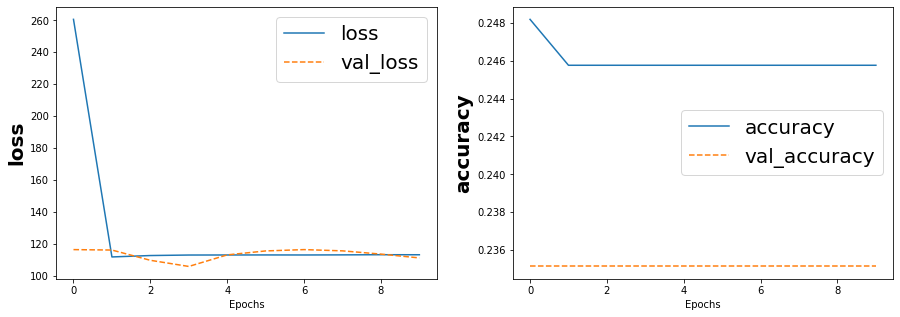

In [ ]:
process_plot(history)